# Information Extraction


How can we extract structured information from text?

This allows us to answer for example the following questions:

- Who receives questions from MEPs?
- When were the answers submitted? How long is the response time?
- Which party is asking most questions?



# Reading in data

In [4]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import pandas as pd

In [20]:
path = './data/parliamentary-questions_2023_sample.csv'
data = pd.read_csv(path, index_col=1)

In [21]:
sample_question = data.question_text.values[100]
print(sample_question)

PE741.586v01-00Question for written answer E-000202/2023
to the Commission
Rule 138
Clara Aguilera (S&D)
Subject: The need to create a European cormorant management plan
In the Committee on Fisheries’ public hearing on 11 May 2022, several experts showed how 
cormorants – which have been a protected species since the 1980s – can hunt prey in such large 
quantities that entire habitats struggle to cope, and the ecosystems concerned cannot be restored.
More recently, during the October 2022 plenary session, a broad majority in Parliament adopted a 
resolution entitled ‘Striving for a sustainable and competitive EU aquaculture: the way forward 
(2021/2189(INI))’. In that resolution, Parliament asks the Commission to prepare a European 
cormorant management plan, since coexistence measures have proved insufficient and the growth of 
cormorant populations is causing serious damage to many marine sectors. This measure is not only 
crucial for the sustainability of some aquaculture practices,

In [22]:
sample_answer = data.answer_text.values[110]
print(sample_answer)

EN
E-000227/2023
Answer given by Ms Vălean
on behalf of the European Commission
(27.3.2023)
As the Commission has explained in the explanatory memorandum of its proposal of 
12 September 2018 on abolishing seasonal time changes1, research indicates that the overall 
energy savings effect of summertime is marginal, despite having been one of the main drivers 
of the current arrangements. That also means abolishing time changes should not significantly 
impact costs of heating and electricity neither for citizens nor for businesses.
However, results tend to vary depending on factors such as geographical location. That is why 
Member States are best placed to decide on whether they want to keep permanent summer- or 
wintertime should seasonal time changes be abolished, taking into account possible scenarios 
for the choice of their permanent standard time.
As rightly mentioned by the Honourable Member, the Commission proposal on discontinuing 
seasonal time changes has not made progress s

# Extracting information from text

## Methods

- Based on document structure. This requires all documents to be structured exactly the same to avoid noise or wrong extractions
- Named Entity Extraction

## Extract the recipient

In [23]:
sample_question.split('\n')

['PE741.586v01-00Question for written answer E-000202/2023',
 'to the Commission',
 'Rule 138',
 'Clara Aguilera (S&D)',
 'Subject: The need to create a European cormorant management plan',
 'In the Committee on Fisheries’ public hearing on 11 May 2022, several experts showed how ',
 'cormorants – which have been a protected species since the 1980s – can hunt prey in such large ',
 'quantities that entire habitats struggle to cope, and the ecosystems concerned cannot be restored.',
 'More recently, during the October 2022 plenary session, a broad majority in Parliament adopted a ',
 'resolution entitled ‘Striving for a sustainable and competitive EU aquaculture: the way forward ',
 '(2021/2189(INI))’. In that resolution, Parliament asks the Commission to prepare a European ',
 'cormorant management plan, since coexistence measures have proved insufficient and the growth of ',
 'cormorant populations is causing serious damage to many marine sectors. This measure is not only ',
 'crucial

In [24]:
def get_recipient_from_question(question):
    recipient_text = question.split('\n')[1]
    return recipient_text.replace('to the ', '')

In [25]:
data['recipient'] = data['question_text'].apply(get_recipient_from_question)

In [26]:
data.recipient.value_counts()

Commission                                                                                  1373
Vice-President of the Commission / High Representative of the Union for Foreign Affairs       97
Council                                                                                       33
Name: recipient, dtype: int64

## Digression: Regular Expressions

Regular expressions (regex) are concise patterns used for searching and manipulating text. 

Examples:
- Websites: `/^www/`
- Extracting dates in the format dd/mm/yyyy: `\d{2}/\d{2}/\d{4}`
- Matching email addresses 


Tools:

- RegEx Generator: https://www.autoregex.xyz/
- RegEx Online Tester: https://regexr.com/

## Extract the date of the answer submission

In [27]:
import re

date_regex = '(\d{1,2}\.\d{1,2}\.\d{4})'

In [28]:
re.findall(date_regex, sample_answer)

['27.3.2023']

In [29]:
def get_answer_date(answer):
    if not isinstance(answer, str):
        return None
    matches = re.findall(date_regex, answer)
    if len(matches) > 0:
        return matches[0]
    else:
        return None

In [30]:
data['answer_date'] = data['answer_text'].apply(get_answer_date)

In [31]:
data.answer_date.unique()

array(['15.3.2023', '6.3.2023', '13.2.2023', '11.1.2023', '10.3.2023',
       '3.3.2023', '21.2.2023', '20.2.2023', '24.2.2023', '17.3.2023',
       '17.2.2023', '16.2.2023', '14.2.2023', '28.3.2023', '28.2.2023',
       '20.3.2023', '15.2.2023', '9.3.2023', '11.4.2023', '9.2.2023',
       '3.4.2023', '13.3.2023', '14.3.2023', '16.3.2023', '27.2.2023',
       '30.3.2023', '9.1.2023', '22.2.2023', '8.1.2023', '2.3.2023',
       '24.3.2023', '1.3.2023', '17.4.2023', '22.3.2023', '12.1.2023',
       '31.3.2023', '10.1.2023', '23.3.2023', '7.3.2023', None,
       '23.1.2023', '23.2.2023', '27.3.2023', '25.1.2023', '16.1.2023',
       '24.1.2023', '18.1.2023', '21.3.2023', '21.4.2023', '13.4.2023',
       '29.3.2023', '4.4.2023', '25.4.2023', '11.5.2023', '8.3.2023',
       '19.1.2023', '31.1.2023', '7.2.2023', '23.4.2023', '30.1.2023',
       '12.4.2023', '26.1.2023', '6.2.2023', '2.2.2023', '1.2.2023',
       '27.4.2023', '3.5.2023', '27.1.2023', '18.4.2023', '14.4.2023',
       '5.4.2023

In [32]:
data[data.answer_date.isnull()]

,Unnamed: 0,document_title,document_type,document_date,question_text,answer_text,recipient,answer_date
document_identifier,,,,,,,,
E-9-2023-000073,98,Commission confirms its support for dubious NGO,Written question,2023-01-11,PE741.309v01-00Question for written answer E-0...,NaN,Commission,None
E-9-2023-000017,99,Greek government assistance for ‘investment’ b...,Written question,2023-01-06,PE741.237v01-00Question for written answer E-0...,NaN,Commission,None
E-9-2023-000148,198,Response to a leaked EU document on Area C,Written question,2023-01-18,PE741.536v02-00Question for written answer E-0...,NaN,Commission,None
E-9-2023-000171,199,Protests in Israel against plans to reform the...,Written question,2023-01-19,PE741.559v01-00Question for written answer E-0...,NaN,Vice-President of the Commission / High Repres...,None
E-9-2023-000362,294,"Recovery and Resilience Facility, NextGenerati...",Written question,2023-02-07,PE742.815v01-00Question for written answer E-0...,NaN,Commission,None
...,...,...,...,...,...,...,...,...
P-9-2023-001267,1498,EU response to the Egyptian President’s order ...,EP priority written question,2023-04-19,PE747.332v01-00Priority question for written a...,NaN,Vice-President of the Commission / High Repres...,None
P-9-2023-001146,1499,Most efficient installations in the sectors co...,EP priority written question,2023-04-05,PE747.143v02-00Priority question for written a...,NaN,Commission,None
P-9-2023-001529,1500,Workers’ rights in Myanmar under the MADE in M...,EP priority written question,2023-05-10,PE749.414v01-00Priority question for written a...,NaN,Commission,None


## How long does it take to respond to a question

In [33]:
data['question_date'] = pd.to_datetime(data['document_date'])
data['answer_date'] = pd.to_datetime(data['answer_date'], dayfirst=True)

In [34]:
def compute_date_difference(start_date, end_date):
    return (end_date - start_date).days

In [35]:
data['response_time'] = data.apply(lambda row: compute_date_difference(row['question_date'], row['answer_date']), axis=1)
data['response_time']

document_identifier
E-9-2023-000080    63.0
E-9-2023-000114    49.0
E-9-2023-000012    39.0
E-9-2023-000074     0.0
E-9-2023-000034    60.0
                   ... 
P-9-2023-001267     NaN
P-9-2023-001146     NaN
P-9-2023-001529     NaN
P-9-2023-001534     NaN
P-9-2023-001535     NaN
Name: response_time, Length: 1503, dtype: float64

In [37]:
data['response_time'].describe()

count    838.000000
mean      37.002387
std       26.695862
min       -3.000000
25%        0.000000
50%       43.000000
75%       56.000000
max      115.000000
Name: response_time, dtype: float64

In [38]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [45]:
# Response time statistics per institution
data.groupby('recipient')['response_time'].describe()

,count,mean,std,min,25%,50%,75%,max
recipient,,,,,,,,
Commission,762.0,37.019685,27.028401,-3.0,0.0,43.0,56.0,115.0
Council,9.0,59.111111,23.882234,0.0,59.0,62.0,72.0,79.0
Vice-President of the Commission / High Representative of the Union for Foreign Affairs,67.0,33.835821,21.649128,0.0,21.0,39.0,47.5,77.0


In [46]:
# Response time statistics by month of questioning
data['question_month'] = data['question_date'].dt.strftime('%Y-%m')
data.groupby('question_month')['response_time'].mean()

question_month
2023-01    46.783394
2023-02    36.585366
2023-03    26.307692
2023-04    19.583333
2023-05          NaN
Name: response_time, dtype: float64

In [47]:
data

,Unnamed: 0,document_title,document_type,document_date,question_text,answer_text,recipient,answer_date,question_date,response_time,question_month
document_identifier,,,,,,,,,,,
E-9-2023-000080,0,Suspension of the payment of funds to Morocco ...,Written question,2023-01-11,PE741.317v01-00Question for written answer E-0...,EN\nE-000080/2023\nAnswer given by Mr Várhelyi...,Commission,2023-03-15,2023-01-11,63.0,2023-01
E-9-2023-000114,1,Shortage of medicines in Greece and the EU,Written question,2023-01-16,PE741.347v01-00Question for written answer E-0...,EN\nE-000114/2023\nAnswer given by Ms Kyriakid...,Commission,2023-03-06,2023-01-16,49.0,2023-01
E-9-2023-000012,2,Declaration of the state of emergency in Peru ...,Written question,2023-01-05,PE741.232v01-00Question for written answer E-0...,EN\nE-000012/2023\nAnswer given by High Repres...,Vice-President of the Commission / High Repres...,2023-02-13,2023-01-05,39.0,2023-01
E-9-2023-000074,3,Shortage of medicines,Written question,2023-01-11,PE741.310v01-00Question for written answer E-0...,(English version)\nQuestion for written answer...,Commission,2023-01-11,2023-01-11,0.0,2023-01
E-9-2023-000034,4,Emergency interventions to address high energy...,Written question,2023-01-09,PE741.254v01-00Question for written answer E-0...,EN\nE-000034/2023\nAnswer given by Ms Simson\n...,Commission,2023-03-10,2023-01-09,60.0,2023-01
...,...,...,...,...,...,...,...,...,...,...,...
P-9-2023-001267,1498,EU response to the Egyptian President’s order ...,EP priority written question,2023-04-19,PE747.332v01-00Priority question for written a...,NaN,Vice-President of the Commission / High Repres...,NaT,2023-04-19,NaN,2023-04
P-9-2023-001146,1499,Most efficient installations in the sectors co...,EP priority written question,2023-04-05,PE747.143v02-00Priority question for written a...,NaN,Commission,NaT,2023-04-05,NaN,2023-04
P-9-2023-001529,1500,Workers’ rights in Myanmar under the MADE in M...,EP priority written question,2023-05-10,PE749.414v01-00Priority question for written a...,NaN,Commission,NaT,2023-05-10,NaN,2023-05


/home/natalie/.local/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 36.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/natalie/.local/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/natalie/.local/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 43.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/natalie/.local/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


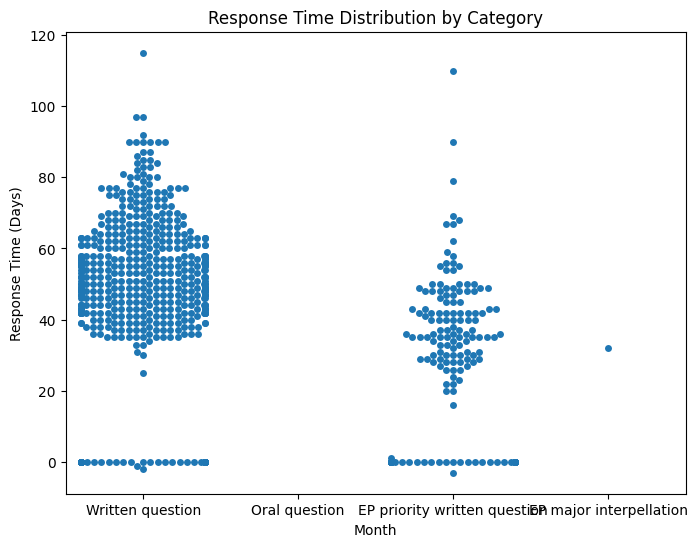

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.swarmplot(x='document_type', y='response_time', data=data)
plt.xlabel('Month')
plt.ylabel('Response Time (Days)')
plt.title('Response Time Distribution by Category')
plt.show()

## Named Entity Recognition

In [127]:
!pip install spacy
!python3 -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 7.4 MB/s eta 0:00:00m eta 0:00:010:00:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [51]:
import spacy

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

def extract_named_entities(text):
    doc = nlp(text)
    named_entities = []

    for entity in doc.ents:
        if entity.label_ in ["DATE", "PERSON", "ORG"]:
            named_entities.append((entity.text, entity.label_))

    return named_entities

In [49]:
sample_question

'PE741.586v01-00Question for written answer E-000202/2023\nto the Commission\nRule 138\nClara Aguilera (S&D)\nSubject: The need to create a European cormorant management plan\nIn the Committee on Fisheries’ public hearing on 11 May 2022, several experts showed how \ncormorants – which have been a protected species since the 1980s – can hunt prey in such large \nquantities that entire habitats struggle to cope, and the ecosystems concerned cannot be restored.\nMore recently, during the October 2022 plenary session, a broad majority in Parliament adopted a \nresolution entitled ‘Striving for a sustainable and competitive EU aquaculture: the way forward \n(2021/2189(INI))’. In that resolution, Parliament asks the Commission to prepare a European \ncormorant management plan, since coexistence measures have proved insufficient and the growth of \ncormorant populations is causing serious damage to many marine sectors. This measure is not only \ncrucial for the sustainability of some aquacult

In [52]:
extract_named_entities(sample_answer)

[('Ms Vălean', 'PERSON'),
 ('the European Commission', 'ORG'),
 ('Commission', 'ORG'),
 ('12 September 2018', 'DATE'),
 ('changes1', 'PERSON'),
 ('Honourable', 'ORG'),
 ('Commission', 'ORG'),
 ('the European Parliament', 'ORG'),
 ('March 2019', 'DATE'),
 ('Council', 'ORG'),
 ('2019', 'DATE'),
 ('Commission', 'ORG'),
 ('the coming years', 'DATE')]